In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

Su tarea es mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día) y contestar las siguientes 2 preguntas: 1) qué dia hubo la mayor cantidad de personas en cuarentena en cada región, y 2) qué día hubo la mayor cantidad de personas en cuarentena en el país?

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Historicas.csv', index_col=False)

In [3]:
dfp = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv', sep=',')

In [4]:
df=df.drop(['Superficie en m2', 'Perímetro en m', 'Detalle'], axis = 1)# boramos las columnas mostradas, ya que, no son de nuestro interés para este trabajo

In [5]:
dfp.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


In [6]:
dfp2 = dfp[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']]# eliminamos todo lo que no nos interesa, en este df nos interesa la población

In [7]:
dfp2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN


In [8]:
dfp3=dfp2.dropna() #damos nuevo nombre al df sin nulas.

In [9]:
df1=df.rename(columns={"Código CUT Comuna":"Codigo comuna"})#para poder combinar dos tablas estas tienen que tener algo en común, por lo que cambiamos el nombre de la columna "Codigo cut comuna" a "Codigo comuna"

In [10]:
df2=df1.merge(dfp3, on="Codigo comuna")#Como explique en la celda anterior, combinamos ambas tablas por su codigo de comuna (que ambas comparten)

In [11]:
df2=df2.drop(["ID"], axis=1)

In [12]:
df2 = df2.drop(columns=['Nombre'])
df2 = df2.drop(columns=['Estado'])
df2 = df2.drop(columns=['Alcance'])
df2 = df2.drop(columns=['Codigo comuna'])#Botamos columnas que no son de nuestro interes en el df con el que ya vamos a trabajar

In [13]:
df2["Fecha de Inicio"]=df2["Fecha de Inicio"].apply(lambda x:x.split(" ")[0])
df2["Fecha de Término"]=df2["Fecha de Término"].apply(lambda x: x.split(" ")[0])# Eliminamos la hora de la columna de fechas

In [14]:
df2["Fecha de Inicio"]=pd.to_datetime(df2["Fecha de Inicio"])# para poder hacer la resta de las fechas, es necesario primero cambiarles el formato, ya que estan en formato object, es por esto que la pasamos a datatime
df2["Fecha de Término"]=pd.to_datetime(df2["Fecha de Término"])

In [15]:
df2['Dias en cuarentena'] = df2['Fecha de Término'].sub(df2['Fecha de Inicio'], axis=0)#Creamos una columna en el df que se llama Dias de cuarentena, esto representa la resta entre la fecha de termino y la fecha de incio

In [16]:
df2['Dias en cuarentena'] = df2['Dias en cuarentena'].dt.days.astype('int16')# Para poder operar esta columna, la pasamos a entero

In [17]:
df2

,Fecha de Inicio,Fecha de Término,Region,Codigo region,Comuna,Poblacion,Dias en cuarentena
0,2020-04-16,2020-05-15,Arica y Parinacota,15,Arica,247552.0,29
1,2020-04-13,2020-05-05,Metropolitana,13,Santiago,503147.0,22
2,2020-03-26,2020-04-13,Metropolitana,13,Santiago,503147.0,18
3,2020-04-09,2020-05-08,Metropolitana,13,Puente Alto,645909.0,29
4,2020-05-08,2020-05-15,Metropolitana,13,Puente Alto,645909.0,7
5,2020-04-16,2020-05-08,Metropolitana,13,San Bernardo,334836.0,22
6,2020-05-08,2020-05-15,Metropolitana,13,San Bernardo,334836.0,7
7,2020-03-30,2020-04-23,Ñuble,16,Chillan,198624.0,24
8,2020-03-30,2020-04-30,Los Lagos,10,Osorno,173410.0,31
9,2020-04-01,2020-05-07,Magallanes,12,Punta Arenas,141984.0,36


In [18]:
comunas = []
for i in df2['Comuna']:
    comunas.append(i)
print(comunas)

['Arica', 'Santiago', 'Santiago', 'Puente Alto', 'Puente Alto', 'San Bernardo', 'San Bernardo', 'Chillan', 'Osorno', 'Punta Arenas', 'Nueva Imperial', 'Lo Barnechea', 'Lo Barnechea', 'Vitacura', 'Vitacura', 'Las Condes', 'Las Condes', 'Providencia', 'Nunoa', 'Nunoa', 'Nunoa', 'Hualpen', 'San Pedro de la Paz', 'Temuco', 'Chillan Viejo', 'Padre Las Casas', 'Isla de Pascua', 'Independencia', 'Independencia', 'Cabo de Hornos', 'Tortel', 'Victoria', 'Angol', 'San Ramon', 'La Pintana', 'Antofagasta', 'Mejillones', 'Quilicura', 'Colina', 'La Reina', 'Lonquimay', 'San Antonio', 'Tiltil', 'San Felipe']


In [19]:
cuarentena = []
for i in df2['Dias en cuarentena']:
    cuarentena.append(i)
print(cuarentena)

[29, 22, 18, 29, 7, 22, 7, 24, 31, 36, 7, 18, 74, 18, 74, 21, 74, 18, 24, 18, 74, 17, 17, 33, 24, 20, 18, 7, 7, 15, 15, 15, 15, 8, 8, 24, 24, 10, 74, 74, 14, 49, 46, 39]


In [20]:
dict_lista = dict(zip(comunas, cuarentena))# se crea un diccionario entre las listas comuna y cuarentena, estas listas serán llamadas mas adelante

In [21]:
reps = [dict_lista[val] if val in dict_lista else 1 for val in df2['Comuna']]
df3 = df2.loc[np.repeat(df2.index.values, reps)]

In [22]:
region2=df3.where(df3["Codigo region"]==2)# Separamos en distintos df cada comuna segun su numero de región. Además, bote los nulos.
Region2=region2.dropna()
region3=df3.where(df3["Codigo region"]==3)
Region3=region3.dropna()
region4=df3.where(df3["Codigo region"]==4)
Region4=region4.dropna()
region5=df3.where(df3["Codigo region"]==5)
Region5=region5.dropna()
region6=df3.where(df3["Codigo region"]==6)
Region6=region6.dropna()
region7=df3.where(df3["Codigo region"]==7)
Region7=region7.dropna()
region8=df3.where(df3["Codigo region"]==8)
Region8=region8.dropna()
region9=df3.where(df3["Codigo region"]==9)
Region9=region9.dropna()
region10=df3.where(df3["Codigo region"]==10)
Region10=region10.dropna()
region11=df3.where(df3["Codigo region"]==11)
Region11=region11.dropna()
region12=df3.where(df3["Codigo region"]==12)
Region12=region12.dropna()
region13=df3.where(df3["Codigo region"]==13)
Region13=region13.dropna()
region14=df3.where(df3["Codigo region"]==14)
Region14=region14.dropna()
region15=df3.where(df3["Codigo region"]==15)
Region15=region15.dropna()
region16=df3.where(df3["Codigo region"]==16)
Region16=region16.dropna()

In [26]:
inicio = datetime(2020,5,5)
fin    = datetime(2020,5,28)#al no poder automatizar este proceso hay que hacerlo manual, poniendo como inicio y termino las fechas respectivas, luego con el codigo timedelta sumamos dias y asi nos dara una lista con todos los dias del intervalo.

lista_fechas_Region2 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
lista_fechas_Region22 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
lista2=lista_fechas_Region2+lista_fechas_Region22

In [30]:
Region2.insert(0,"Fecha",lista2,True)#insertamos todos los datos de las fechas al df de la Región 2 

In [148]:
r2 = Region2.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)# Eliminamos las columnas que no serán relevantes,este vendria siendo nuestro df final de la región 2

In [36]:
inicio = datetime(2020,3,19)#Desde aca en adelante se sigue el mismo proceso de las celdas anteriores, en caso de que las regiones tengan mas de una comuna en cuarentena hay que hacer una suma de las listas de fechas.
fin    = datetime(2020,4,5)

inicio2=datetime(2020,6,9)
fin2=datetime(2020,7,27)
inicio3=datetime(2020,6,19)
fin3=datetime(2020,7,27)

lista_fechas_Region5 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
lista_fechas_Region55 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)]
lista_fechas_Region555 = [(inicio3 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin3 - inicio3).days + 1)]
lista5=lista_fechas_Region5+lista_fechas_Region55+lista_fechas_Region555

In [38]:
Region5.insert(0,"Fecha",lista5,True)

In [147]:
r5 = Region5.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [45]:
inicio = datetime(2020,3,30)
fin    = datetime(2020,4,15)

inicio2=  datetime(2020,3,30)
fin2= datetime(2020,4,15)
lista_fechas_Region8 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
lista_fechas_Region88 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)]
lista8=lista_fechas_Region8+lista_fechas_Region88

In [46]:
Region8.insert(0,"Fecha",lista8,True)

In [146]:
r8 = Region8.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [121]:
inicio = datetime(2020,4,9)
fin    = datetime(2020,4,15)
inicio2 = datetime(2020,3,28)
fin2    = datetime(2020,4,29)
inicio3 = datetime(2020,3,27)
fin3    = datetime(2020,4,15)
inicio4 = datetime(2020,4,30)
fin4   = datetime(2020,5,14)
inicio5 = datetime(2020,4,30)
fin5    = datetime(2020,5,14)
inicio6 = datetime(2020,5,22)
fin6    = datetime(2020,6,4)
lista_fechas_Region9 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
lista_fechas_Region99 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)]
lista_fechas_Region999 = [(inicio3 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin3 - inicio3).days + 1)]
lista_fechas_Region9999 = [(inicio4 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin4 - inicio4).days + 1)]
lista_fechas_Region99999 = [(inicio5 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin5 - inicio5).days + 1)]
lista_fechas_Region999999 = [(inicio6 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin6 - inicio6).days + 1)]
lista9=lista_fechas_Region9+lista_fechas_Region99+lista_fechas_Region999+lista_fechas_Region9999+lista_fechas_Region99999+lista_fechas_Region999999

In [123]:
Region9.insert(0,"Fecha",lista9,True)

In [145]:
r9 = Region9.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [49]:
inicio = datetime(2020,3,30)
fin    = datetime(2020,4,29)

lista_fechas_Region10 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 

In [50]:
Region10.insert(0,"Fecha",lista_fechas_Region10,True)

In [144]:
r10 = Region10.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [54]:
inicio = datetime(2020,3,12)
fin    = datetime(2020,3,26)

lista_fechas_Region11 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 

In [55]:
Region11.insert(0,"Fecha",lista_fechas_Region11,True)

In [143]:
r11 = Region11.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [62]:
inicio = datetime(2020,4,1)
fin    = datetime(2020,5,6)
inicio2 = datetime(2020,3,22)
fin2   = datetime(2020,4,5)
lista_fechas_Region12 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
lista_fechas_Region122 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)]
lista12=lista_fechas_Region12+lista_fechas_Region122

In [63]:
Region12.insert(0,"Fecha",lista12,True)

In [142]:
r12 = Region12.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [70]:
inicio = datetime(2020,4,16)
fin    = datetime(2020,5,14)
lista_fechas_Region15 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]

In [71]:
Region15.insert(0,"Fecha",lista_fechas_Region15,True)

In [141]:
r15 = Region15.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [74]:
inicio = datetime(2020,3,30)
fin    = datetime(2020,4,22)
inicio2 = datetime(2020,3,30)
fin2   = datetime(2020,4,22)
lista_fechas_Region16 = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
lista_fechas_Region166 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)]
lista16=lista_fechas_Region16+lista_fechas_Region166

In [75]:
Region16.insert(0,"Fecha",lista16,True)

In [140]:
r16 = Region16.drop(['Fecha de Inicio', 'Fecha de Término', 'Dias en cuarentena'], axis = 1)

In [149]:
Regiones=pd.concat([r2,r5,r8,r9,r10,r11,r12,r15,r16])#Luego de poner todas las fechas, volvemos a juntar todos los df de regiones a traves de la función concat

<AxesSubplot:xlabel='Fecha', ylabel='Poblacion'>

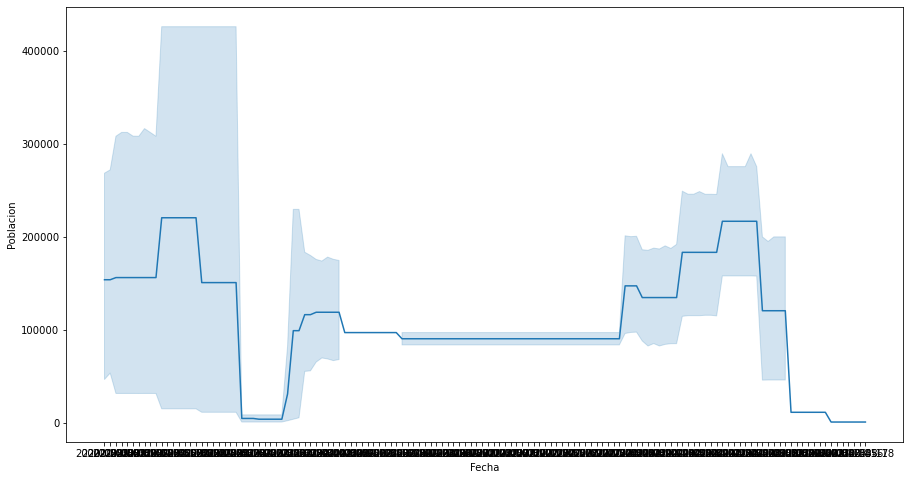

In [157]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Fecha",y="Poblacion", data=Regiones)

In [ ]:
#se puede apreciar en el grafico, que en la fecha en donde mas gente estuvo en cuarentena fue al inicio de estas (no logre que se aclararan las fechas), por otro lado tambien esta claro el re brote.

In [35]:
Inicio=[]
for i in df2["Fecha de Inicio"]:#intento de automatizar el proceso anterior
    Inicio.append(i)

Final=[]
for j in df2["Fecha de Término"]:
    Final.append(j)
m=[]
for k,l in zip(Inicio,Final):

    inicio = k
    fin    = l

    m.append([(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                            for d in range((fin - inicio).days + 1)])